In [198]:
import pandas as panda
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

In [199]:
df = panda.read_csv('TSLA.csv') 

In [200]:
#Convert from Date column string to float
df['Date'] = panda.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal) 

In [201]:
#Dropping all unnecessary columns
df_date_close = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns")

In [202]:
# split the data into train and test set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=False)

In [203]:
# Sepetaing the Date and Stockprice columns for the Train data
train_date = train[['Date']] 
train_close = train[['Close']] 

# Sepetaing the Date and Stockprice columns for the Test data
test_close = test[['Close']]
test_date = test[['Date']] 

In [204]:
# linear regression on training data
reg_obj_train = linear_model.LinearRegression()
reg_obj_train.fit(train_date,train_close)
train_prediction = reg_obj_train.predict(train_date)

# Converting int dates into DateTime for train_date
train_date_dt = train_date['Date'].apply(dt.datetime.fromordinal)

In [205]:
train_prediction = reg_obj_train.predict(train_date)

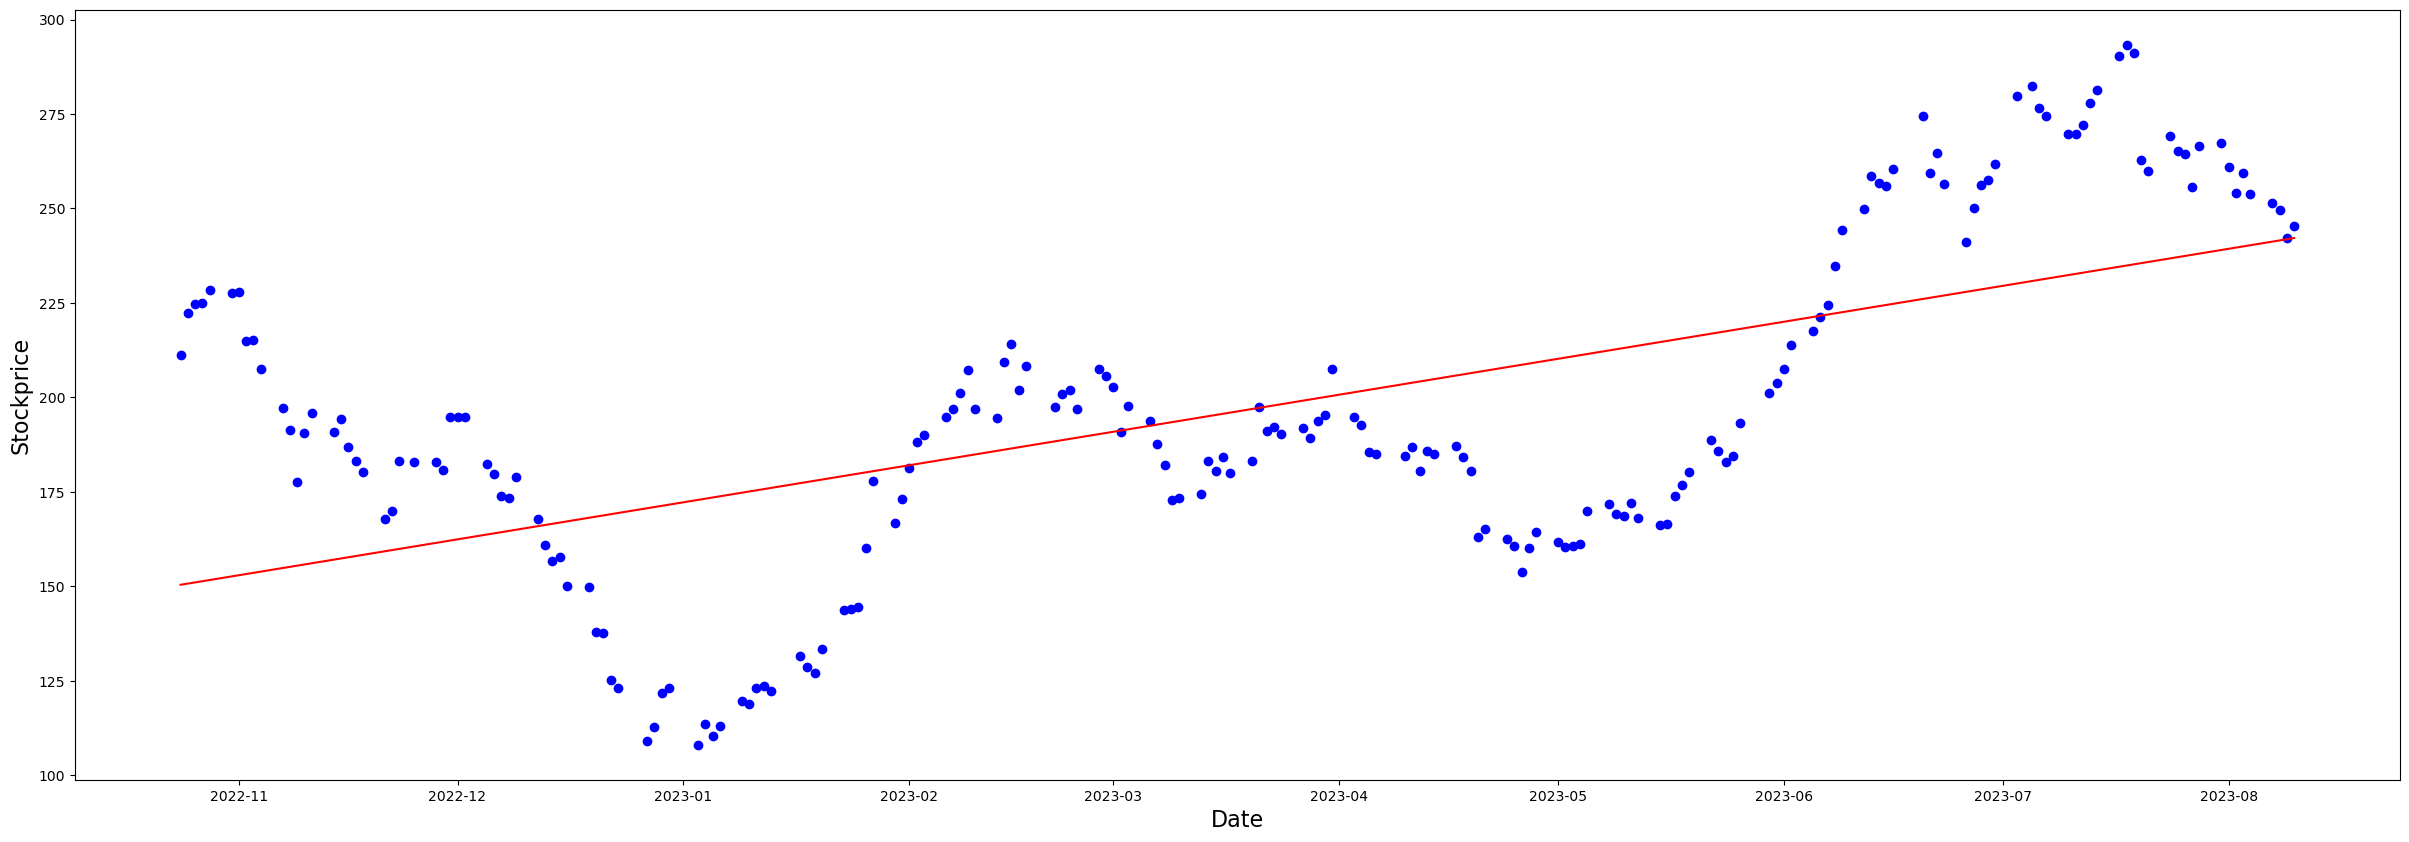

In [206]:
# Plot for visualising the Train data and Linear Regression
plt.figure(figsize=(30,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)

#Visual Represention of linear equation with Linear Regression
plt.scatter(train_date_dt,train_close,color='blue')
plt.plot(train_date_dt,train_prediction,color='red')

In [207]:
test_prediction = reg_obj_train.predict(test_date)

In [208]:
# Converting int dates into DateTime for test_date
test_date_dt = test_date['Date'].apply(dt.datetime.fromordinal)

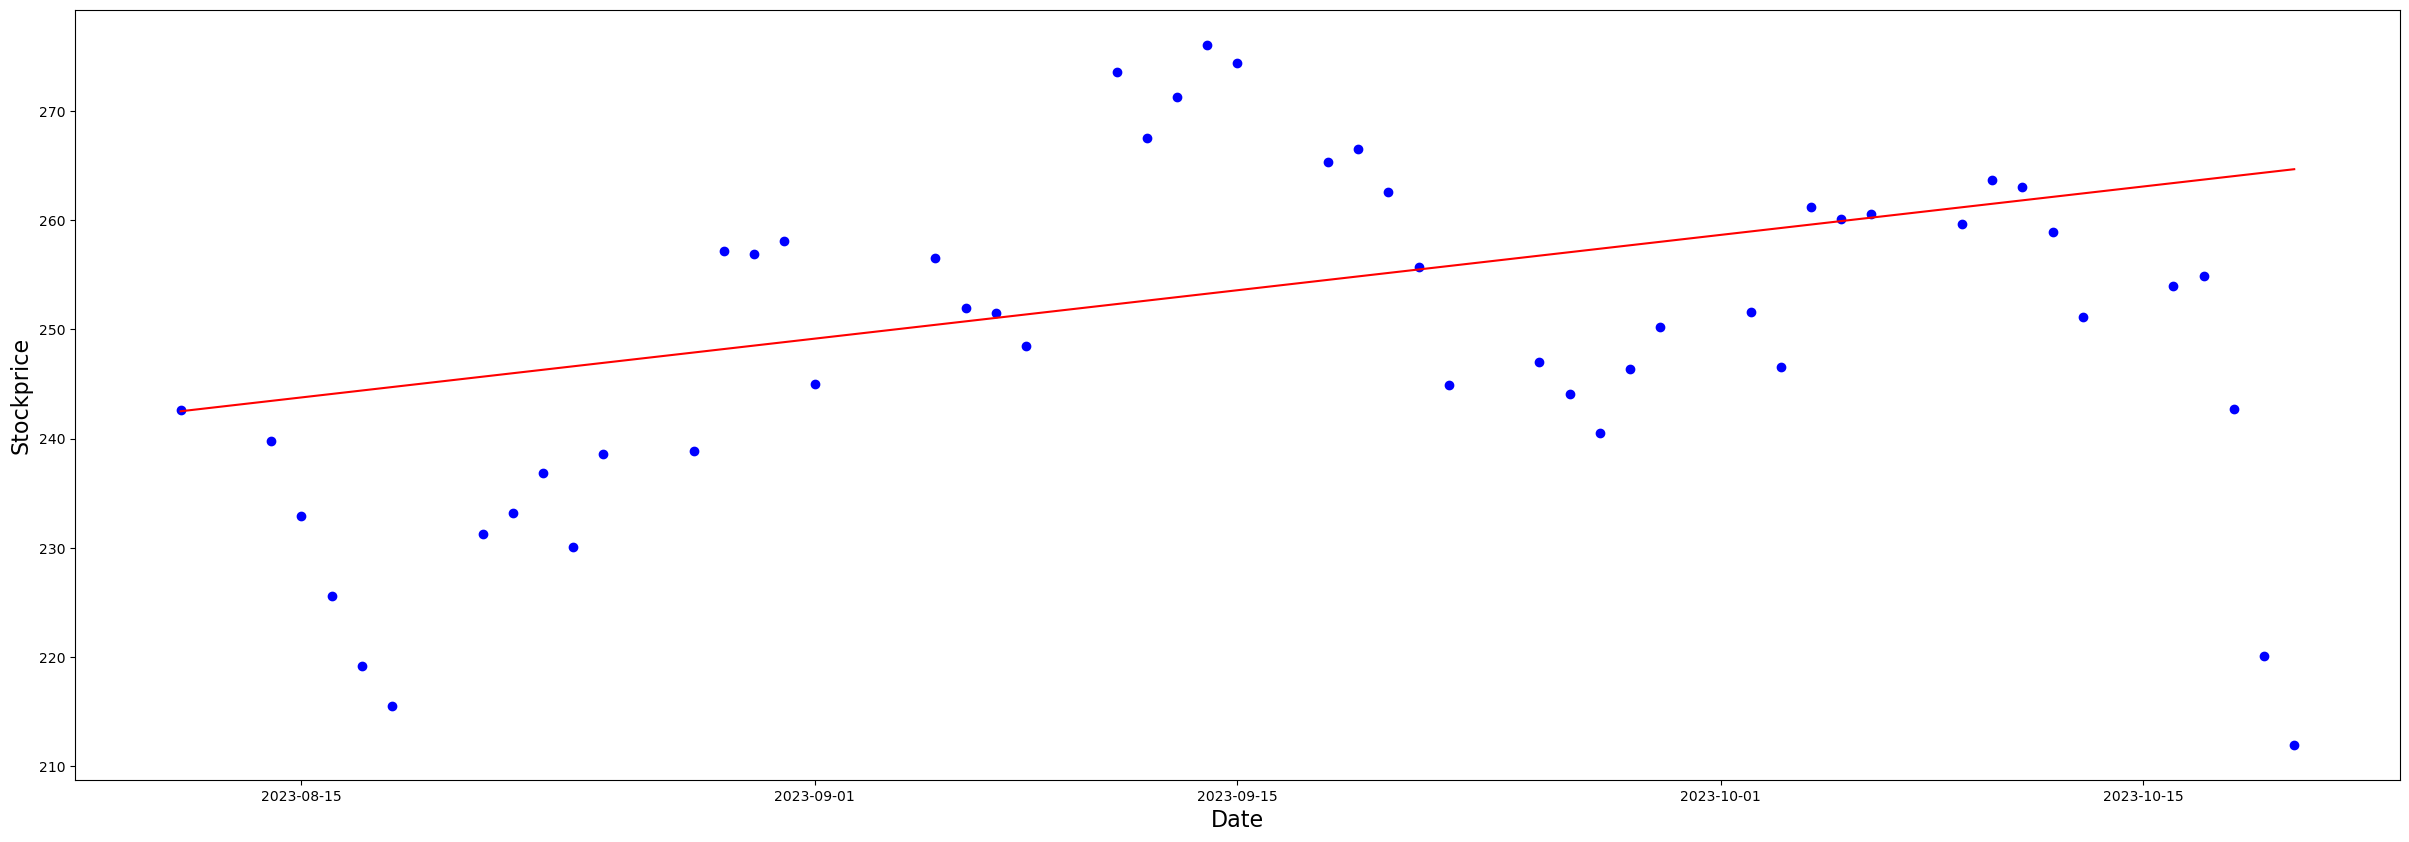

In [209]:
# Plot for visualising predictions on the Test Dataset
plt.figure(figsize=(30,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)

# Visual Represention of linear equation with Linear Regression
plt.scatter(test_date_dt,test_close,color='blue')
plt.plot(test_date_dt, test_prediction,color='red')

In [210]:
# Formating input date before input to the prediction algorithm
input_date = dt.date(2023, 12, 12)
input_od = input_date.toordinal()

# Prediction stockprice based on input date
output_train = reg_obj_train.predict([[input_od]])

# Formating input date and predicted stockprice before output
formated_date = input_date.strftime("%D");
formated_stockprice = str('%.10f' % output_train[0][0])

# Outputing the prediction
outputString = "Predicted stock price for " + formated_date + " is: " + formated_stockprice;
print(outputString)

Predicted stock price for 12/12/23 is: 281.4204197137


c:\Users\Sam\anaconda3\envs\dave3625\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [211]:
# Measure for how good the regression fits the data
r2_train = r2_score(train_close, train_prediction) # Calculate R-squared for training data
r2_train_percent = r2_train * 100 # Convert to percentage
print('prediction percentage score : %.2f%%' % r2_train_percent) # Print with percentage sign

prediction percentage score : 37.60%
